In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [3]:
feature_x_sample = pd.read_table('feature_x_sample.tsv', index_col=0)

feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,2.431950,2.285786,0.093278,-0.715936,1.446825,1.937605,1.022591,-1.911792,1.947112,1.467027,...,-0.277204,1.194503,-0.324539,1.049923,0.322982,0.393212,-0.426775,-1.032427,2.210129,-0.738514
SOX10,-1.729977,1.724498,0.785717,-1.777906,1.183808,-0.975388,-5.992516,0.625689,1.845708,-1.114818,...,0.809880,-8.072094,-1.209092,-6.693631,-8.448398,-4.202099,-7.521501,-0.192991,-1.535883,1.274517
ERBB3,1.021403,0.712437,-1.100162,0.785717,1.013481,0.091852,0.655001,-0.131000,0.709268,0.193652,...,-6.012322,2.102783,0.863751,0.895440,-0.205627,1.639730,1.198464,-1.981507,-0.980537,-0.663253
MYC,1.775596,1.147762,-1.435271,2.407392,2.166557,0.910492,1.991476,-0.421626,0.796412,0.927129,...,0.818991,1.921365,-1.837323,-0.507978,-0.157262,1.705485,-1.593715,-2.390292,-0.879529,-1.463791
MAP4K4,2.066341,-1.407940,0.790867,0.523096,1.990684,0.792451,1.999794,-0.759904,-0.102242,0.269784,...,0.022623,-0.197348,0.069709,0.363939,3.109298,0.829686,2.083770,2.391151,2.629609,-0.860912
GAPDH,3.396082,-1.558858,-2.408117,4.163743,-1.689970,4.258810,-3.452659,2.090504,-0.743267,4.488553,...,3.088701,3.436089,-2.498034,3.822296,-2.300772,1.083196,-1.591735,-0.957959,-2.087268,2.035444
FAT1,0.220865,-1.712152,0.526265,0.066738,-0.680682,0.369921,-0.762280,-0.769014,-0.406970,-1.101747,...,-1.074415,-0.477477,0.133958,-0.710786,-1.296237,-0.332263,1.385824,0.458531,1.329972,-0.182415
PTEN,-1.100954,-0.011806,-1.834946,-0.302397,-1.692347,-0.164115,-0.849821,-0.558284,-1.029259,-1.683632,...,-1.581040,-0.725442,0.109399,-0.209152,-0.649785,-1.444382,1.653594,0.438725,1.308979,-1.032427
TP53,-0.659688,2.229142,-0.881906,2.277468,1.315316,2.018016,-2.274232,0.403867,-1.410316,0.447439,...,-0.821697,5.142135,1.092703,6.433453,2.424820,2.496912,-0.793177,-1.375063,-2.045281,2.094465


In [4]:
feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-'),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,1.273035,1.196565,0.049496,-0.373866,0.757640,1.014405,0.535691,-0.999510,1.019379,0.768209,...,-0.144332,0.625631,-0.169096,0.549990,0.169672,0.206414,-0.222584,-0.539447,1.156983,-0.385678
SOX10,-0.904389,0.902912,0.411764,-0.929464,0.620036,-0.509605,-3.134450,0.328041,0.966326,-0.582552,...,0.424405,-4.222437,-0.631874,-3.501257,-4.419310,-2.197746,-3.934379,-0.100273,-0.802843,0.667493
ERBB3,0.535069,0.373426,-0.574884,0.411764,0.530925,0.048750,0.343376,-0.067841,0.371768,0.102009,...,-3.144812,1.100822,0.452589,0.469168,-0.106884,0.858564,0.627704,-1.035983,-0.512299,-0.346303
MYC,0.929646,0.601177,-0.750205,1.260186,1.134187,0.477043,1.042589,-0.219890,0.417359,0.485747,...,0.429172,1.005908,-0.960550,-0.265067,-0.081581,0.892965,-0.833100,-1.249850,-0.459454,-0.765126
MAP4K4,1.081757,-0.735906,0.414458,0.274367,1.042175,0.415287,1.046941,-0.396869,-0.052796,0.141840,...,0.012531,-0.102553,0.037165,0.191100,1.627408,0.434767,1.090875,1.251690,1.376445,-0.449714
GAPDH,1.777446,-0.814863,-1.259176,2.179069,-0.883458,2.228805,-1.805656,1.094398,-0.388165,2.349002,...,1.616631,1.798377,-1.306218,2.000432,-1.203015,0.567398,-0.832063,-0.500487,-1.091315,1.065592
FAT1,0.116246,-0.895063,0.276025,0.035611,-0.355422,0.194229,-0.398112,-0.401635,-0.212222,-0.575713,...,-0.561414,-0.249110,0.070779,-0.371172,-0.677466,-0.173137,0.725726,0.240588,0.696506,-0.094740
PTEN,-0.575299,-0.005482,-0.959306,-0.157512,-0.884701,-0.085166,-0.443911,-0.291386,-0.537789,-0.880142,...,-0.826468,-0.378839,0.057930,-0.108729,-0.339257,-0.754972,0.865817,0.230226,0.685522,-0.539447
TP53,-0.344438,1.166930,-0.460697,1.192213,0.688838,1.056474,-1.189130,0.211989,-0.737150,0.234785,...,-0.429198,2.690940,0.572372,3.366528,1.269305,1.307022,-0.414277,-0.718706,-1.069348,1.096470


In [5]:
array_1d = np.random.random_sample(10)

In [6]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)

print('N={}\tLocation={}\tScale={}\tDF={}\tShape={}'.format(
    n, location, scale, df, shape))

N=10	Location=0.060401097693203454	Scale=0.45483719274060275	DF=12144323.103151232	Shape=17843274.99225048


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


In [7]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    print(value.shape)
    print()

fit
[  1.00000000e+01   6.04010977e-02   4.54837193e-01   1.21443231e+07
   1.78432750e+07]
(5,)

grid
[ 0.06040123  0.06071173  0.06102224 ...,  0.99099421  0.99130472
  0.99161522]
(3000,)

pdf
[ 1.7542197   1.75421967  1.75421844 ...,  0.21631569  0.21601371
  0.21571205]
(3000,)

pdf_transformed
[ 1.75421833  0.          0.         ...,  0.          0.          0.        ]
(3000,)

context_indices
[ 0.92263417  1.          1.         ...,  1.          1.          1.        ]
(3000,)

context_indices_like_array
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          0.92263417]
(10,)

context_summary
4.18076387603
()



/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


In [8]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(feature_x_sample)

feature_x_skew_t_pdf_fit_parameter

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


,N,Location,Scale,DF,Shape
Feature,,,,,
KRAS,501.0,1.083134,1.164276,4.304404,-3.030141
SOX10,501.0,0.550759,0.592352,2.306269,-0.929936
ERBB3,501.0,0.452065,0.606837,3.987382,-1.111767
MYC,501.0,-0.946117,1.227358,15.292826,2.261238
MAP4K4,501.0,0.482435,0.885836,7.522608,-0.764376
GAPDH,501.0,-1.666932,2.259656,3696.235986,2.329652
FAT1,501.0,-0.173531,0.362649,15.376328,0.699476
PTEN,501.0,-0.808279,1.057883,363.070834,3.100225
TP53,501.0,-1.357792,1.506079,6.161571,5.347680


In [9]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    feature_x_sample)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)
/Users/k/Jumis/conda/lib/python3.6/site-packages/

In [10]:
context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
Feature,,,,,,,,,,,,,,,,,,,,,
KRAS,0.000000,0.000000,-3.278804e-01,-7.999084e-01,0.000000,0.000000,-0.000000,-0.994897,0.000000e+00,0.000000,...,-0.569440,0.000000,-0.598763,-0.000000,-0.175731,-0.130302,-0.659261,-9.044599e-01,0.000000,-0.809646
SOX10,-0.834981,0.000000,0.000000e+00,-8.518202e-01,0.000000,-0.401656,-1.000000,0.000000,0.000000e+00,-0.497739,...,0.000000,-1.000000,-0.560012,-1.000000,-1.000000,-0.999994,-1.000000,-2.048165e-03,-0.749865,0.000000
ERBB3,0.000000,0.000000,-2.087524e-01,0.000000e+00,0.000000,-0.000000,0.000000,-0.000000,0.000000e+00,-0.000000,...,-1.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-7.818739e-01,-0.145466,-0.037107
MYC,0.529448,0.215581,-0.000000e+00,8.061272e-01,0.714906,0.126807,0.636192,0.000000,9.358044e-02,0.131858,...,0.099965,0.602291,-0.000000,0.000000,0.000000,0.492989,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-0.000906,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000000,-0.000000e+00,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,0.214703,-0.000000,-0.000000e+00,4.559483e-01,-0.000000,0.487692,-0.000000,0.017895,1.867665e-16,0.563697,...,0.140289,0.225991,-0.000000,0.344008,-0.000000,0.000475,-0.000000,0.000000e+00,-0.000000,0.015472
FAT1,0.000000,-0.000000,1.441282e-10,0.000000e+00,-0.000000,0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.014551,5.190272e-13,0.008534,-0.000000
PTEN,-0.000000,0.000126,-0.000000e+00,1.659325e-07,-0.000000,0.000008,-0.000000,0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000694,0.000003,-0.000000,-0.000000,0.811021,1.712708e-02,0.553873,-0.000000
TP53,0.448224,1.000000,2.623081e-01,9.999999e-01,0.999777,0.999999,-0.000000,0.967799,0.000000e+00,0.973058,...,0.312666,1.000000,0.999042,1.000000,1.000000,1.000000,0.340038,0.000000e+00,-0.000000,1.000000


In [11]:
feature_context_summary

Feature
KRAS     -198.543219
SOX10    -139.732904
ERBB3     -73.107554
MAP4K4    -43.960223
FAT1        2.300595
PTEN       91.588719
MYC       115.802540
GAPDH     132.516220
TP53      244.191783
Name: Context Summary, dtype: float64

In [12]:
absolute_value_weighted_context__feature_x_sample = feature_x_sample.abs(
) * context__feature_x_sample

absolute_value_weighted_context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,0.000000,0.000000e+00,-1.622867e-02,-2.990584e-01,0.000000,0.000000e+00,-0.000000,-0.994409,0.000000e+00,0.000000,...,-0.082188,0.000000,-0.101249,-0.000000e+00,-0.029817,-0.026896,-0.146741,-4.879081e-01,0.000000,-0.312263
SOX10,-0.755147,0.000000e+00,0.000000e+00,-7.917363e-01,0.000000,-2.046857e-01,-3.134450,0.000000,0.000000e+00,-0.289959,...,0.000000,-4.222437,-0.353857,-3.501257e+00,-4.419310,-2.197733,-3.934379,-2.053765e-04,-0.602024,0.000000
ERBB3,0.000000,0.000000e+00,-1.200085e-01,0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.000000,...,-3.144812,0.000000,0.000000,0.000000e+00,-0.000000,0.000000,0.000000,-8.100083e-01,-0.074522,-0.012850
MYC,0.492199,1.296027e-01,-0.000000e+00,1.015871e+00,0.810837,6.049260e-02,0.663287,0.000000,3.905668e-02,0.064050,...,0.042902,0.605849,-0.000000,0.000000e+00,0.000000,0.440222,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-6.668055e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-0.000000,-0.000000e+00,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,0.381623,-0.000000e+00,-0.000000e+00,9.935426e-01,-0.000000,1.086970e+00,-0.000000,0.019585,7.249623e-17,1.324125,...,0.226795,0.406418,-0.000000,6.881651e-01,-0.000000,0.000269,-0.000000,0.000000e+00,-0.000000,0.016487
FAT1,0.000000,-0.000000e+00,3.978296e-11,0.000000e+00,-0.000000,0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000e+00,-0.000000,-0.000000,0.010560,1.248715e-13,0.005944,-0.000000
PTEN,-0.000000,6.916929e-07,-0.000000e+00,2.613635e-08,-0.000000,6.422571e-07,-0.000000,0.000000,-0.000000e+00,-0.000000,...,-0.000000,-0.000000,0.000040,2.811483e-07,-0.000000,-0.000000,0.702196,3.943096e-03,0.379692,-0.000000
TP53,0.154385,1.166930e+00,1.208447e-01,1.192213e+00,0.688685,1.056473e+00,-0.000000,0.205163,0.000000e+00,0.228459,...,0.134195,2.690940,0.571823,3.366528e+00,1.269305,1.307022,0.140870,0.000000e+00,-0.000000,1.096470


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


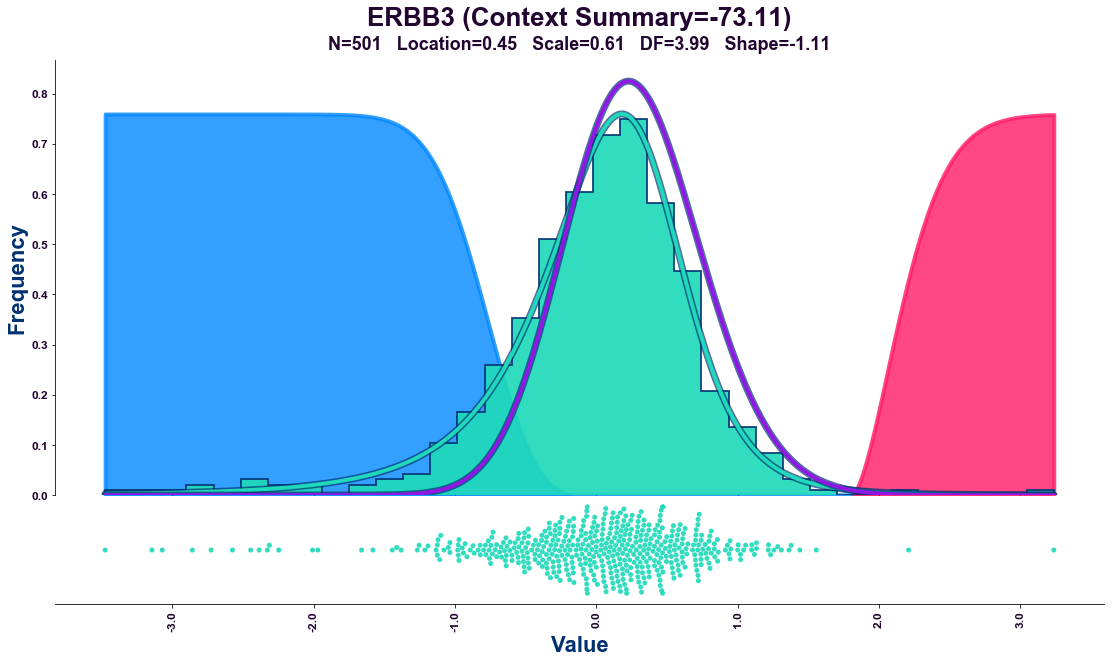

In [13]:
feature = 'ERBB3'

plot_context(feature_x_sample.loc[feature], feature)